In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

In [2]:
df2 = pd.read_csv("cost_per_household.csv")

In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   YEAR          1512 non-null   int64 
 1   REGION        1512 non-null   object
 2   AREA          1512 non-null   object
 3   TYPE_EXPENSE  1512 non-null   object
 4   VALUE         1512 non-null   int64 
 5   UNIT          1512 non-null   object
 6   SOURCE        1512 non-null   object
dtypes: int64(2), object(5)
memory usage: 82.8+ KB


In [4]:
df2.head()

,YEAR,REGION,AREA,TYPE_EXPENSE,VALUE,UNIT,SOURCE
0,2554,ทั่วราชอาณาจักร,รวม,ค่าใช้จ่ายทั้งสิ้นต่อเดือน,17403,บาท,สำนักงานสถิติแห่งชาติ
1,2554,ทั่วราชอาณาจักร,รวม,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค,15328,บาท,สำนักงานสถิติแห่งชาติ
2,2554,ทั่วราชอาณาจักร,รวม,อาหาร และเครื่องดื่ม (ไม่มีแอลกอฮอล์),5660,บาท,สำนักงานสถิติแห่งชาติ
3,2554,ทั่วราชอาณาจักร,รวม,เครื่องดื่มที่มีแอลกอฮอล์,95,บาท,สำนักงานสถิติแห่งชาติ
4,2554,ทั่วราชอาณาจักร,รวม,ยาสูบ หมาก ยานัตถุ์ และอื่นๆ,85,บาท,สำนักงานสถิติแห่งชาติ


In [5]:
df2["TYPE_EXPENSE"].unique()

array(['ค่าใช้จ่ายทั้งสิ้นต่อเดือน', 'ค่าใช้จ่ายเพื่อการอุปโภคบริโภค',
       'อาหาร และเครื่องดื่ม (ไม่มีแอลกอฮอล์)',
       'เครื่องดื่มที่มีแอลกอฮอล์', 'ยาสูบ หมาก ยานัตถุ์ และอื่นๆ\xa0',
       'ที่อยู่อาศัย เครื่องแต่งบ้าน และเครื่องใช้ต่าง ๆ',
       'เครื่องนุ่งห่มและรองเท้า', 'ค่าใช้จ่ายส่วนบุคคล',
       'เวชภัณฑ์และค่าตรวจรักษาพยาบาล', 'การเดินทางและการสื่อสาร',
       'การศึกษา', 'การบันเทิง การอ่านและกิจกรรมทางศาสนา',
       'การจัดงานพิธีในโอกาสพิเศษ',
       'ค่าใช้จ่ายที่ไม่เกี่ยวกับการอุปโภคบริโภค'], dtype=object)

In [12]:
df2['TYPE_EXPENSE'].replace({'ค่าใช้จ่ายทั้งสิ้นต่อเดือน': 'Total expenses per month'}, inplace=True)
df2['TYPE_EXPENSE'].replace({'ค่าใช้จ่ายเพื่อการอุปโภคบริโภค': 'Consumption expenses'}, inplace=True)
df2['TYPE_EXPENSE'].replace({'อาหาร และเครื่องดื่ม (ไม่มีแอลกอฮอล์)': 'Food and drink (no alcohol)'}, inplace=True)
df2['TYPE_EXPENSE'].replace({'เครื่องดื่มที่มีแอลกอฮอล์': 'Alcoholic drinks'}, inplace=True)
df2['TYPE_EXPENSE'].replace({'ยาสูบ หมาก ยานัตถุ์ และอื่นๆ\xa0': 'Tobacco, betel nut, snuff, etc.'}, inplace=True)
df2['TYPE_EXPENSE'].replace({'ที่อยู่อาศัย เครื่องแต่งบ้าน และเครื่องใช้ต่าง ๆ': 'Housing, home decorations and various appliances.'}, inplace=True)
df2['TYPE_EXPENSE'].replace({'เครื่องนุ่งห่มและรองเท้า': 'Clothing and shoes'}, inplace=True)
df2['TYPE_EXPENSE'].replace({'ค่าใช้จ่ายส่วนบุคคล': 'Personal expenses'}, inplace=True)
df2['TYPE_EXPENSE'].replace({'เวชภัณฑ์และค่าตรวจรักษาพยาบาล': 'Medical supplies and medical examination costs'}, inplace=True)
df2['TYPE_EXPENSE'].replace({'การเดินทางและการสื่อสาร': 'Travel and communication'}, inplace=True)
df2['TYPE_EXPENSE'].replace({'การศึกษา': 'Education'}, inplace=True)
df2['TYPE_EXPENSE'].replace({'การบันเทิง การอ่านและกิจกรรมทางศาสนา': 'Entertainment, reading and religious activities'}, inplace=True)
df2['TYPE_EXPENSE'].replace({'การจัดงานพิธีในโอกาสพิเศษ': 'Organizing ceremonies on special occasions'}, inplace=True)
df2['TYPE_EXPENSE'].replace({'ค่าใช้จ่ายที่ไม่เกี่ยวกับการอุปโภคบริโภค': 'Non-consumption expenses'}, inplace=True)

In [13]:
df2["TYPE_EXPENSE"].unique()

array(['Total expenses per month', 'Consumption expenses',
       'Food and drink (no alcohol)', 'Alcoholic drinks',
       'Tobacco, betel nut, snuff, etc.',
       'Housing, home decorations and various appliances.',
       'Clothing and shoes', 'Personal expenses',
       'Medical supplies and medical examination costs',
       'Travel and communication', 'Education',
       'Entertainment, reading and religious activities',
       'Organizing ceremonies on special occasions',
       'Non-consumption expenses'], dtype=object)

In [11]:
df2["TYPE_EXPENSE"] == "Total expenses per month"

0        True
1       False
2       False
3       False
4       False
        ...  
1507    False
1508    False
1509    False
1510    False
1511    False
Name: TYPE_EXPENSE, Length: 1512, dtype: bool

In [14]:
df2

,YEAR,REGION,AREA,TYPE_EXPENSE,VALUE,UNIT,SOURCE
0,2554,ทั่วราชอาณาจักร,รวม,Total expenses per month,17403,บาท,สำนักงานสถิติแห่งชาติ
1,2554,ทั่วราชอาณาจักร,รวม,Consumption expenses,15328,บาท,สำนักงานสถิติแห่งชาติ
2,2554,ทั่วราชอาณาจักร,รวม,Food and drink (no alcohol),5660,บาท,สำนักงานสถิติแห่งชาติ
3,2554,ทั่วราชอาณาจักร,รวม,Alcoholic drinks,95,บาท,สำนักงานสถิติแห่งชาติ
4,2554,ทั่วราชอาณาจักร,รวม,"Tobacco, betel nut, snuff, etc.",85,บาท,สำนักงานสถิติแห่งชาติ
...,...,...,...,...,...,...,...
1507,2564,ภาคใต้,นอกเขตเทศบาล,Travel and communication,4127,บาท,สำนักงานสถิติแห่งชาติ
1508,2564,ภาคใต้,นอกเขตเทศบาล,Education,215,บาท,สำนักงานสถิติแห่งชาติ
1509,2564,ภาคใต้,นอกเขตเทศบาล,"Entertainment, reading and religious activities",223,บาท,สำนักงานสถิติแห่งชาติ
1510,2564,ภาคใต้,นอกเขตเทศบาล,Organizing ceremonies on special occasions,141,บาท,สำนักงานสถิติแห่งชาติ


Dropdown(description='Type of Expense:', options=('Total expenses per month', 'Consumption expenses', 'Food an…

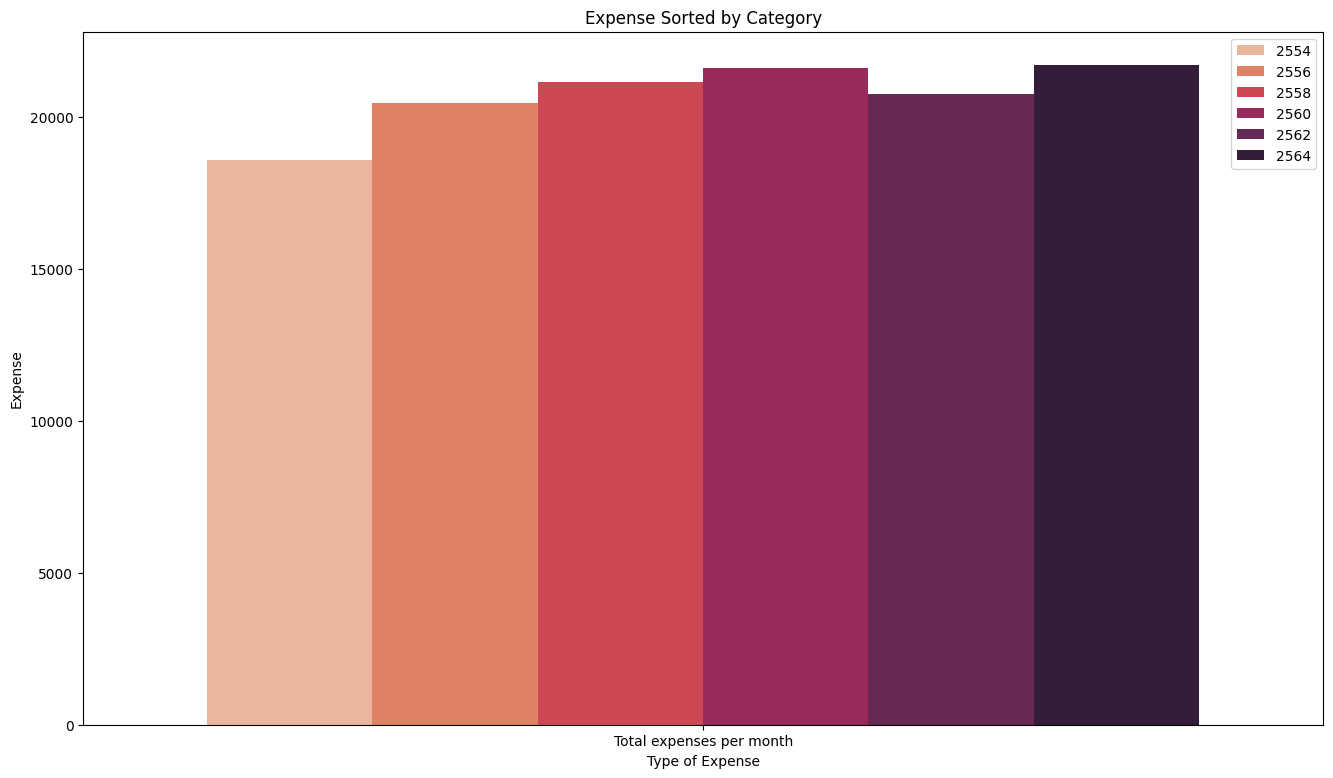

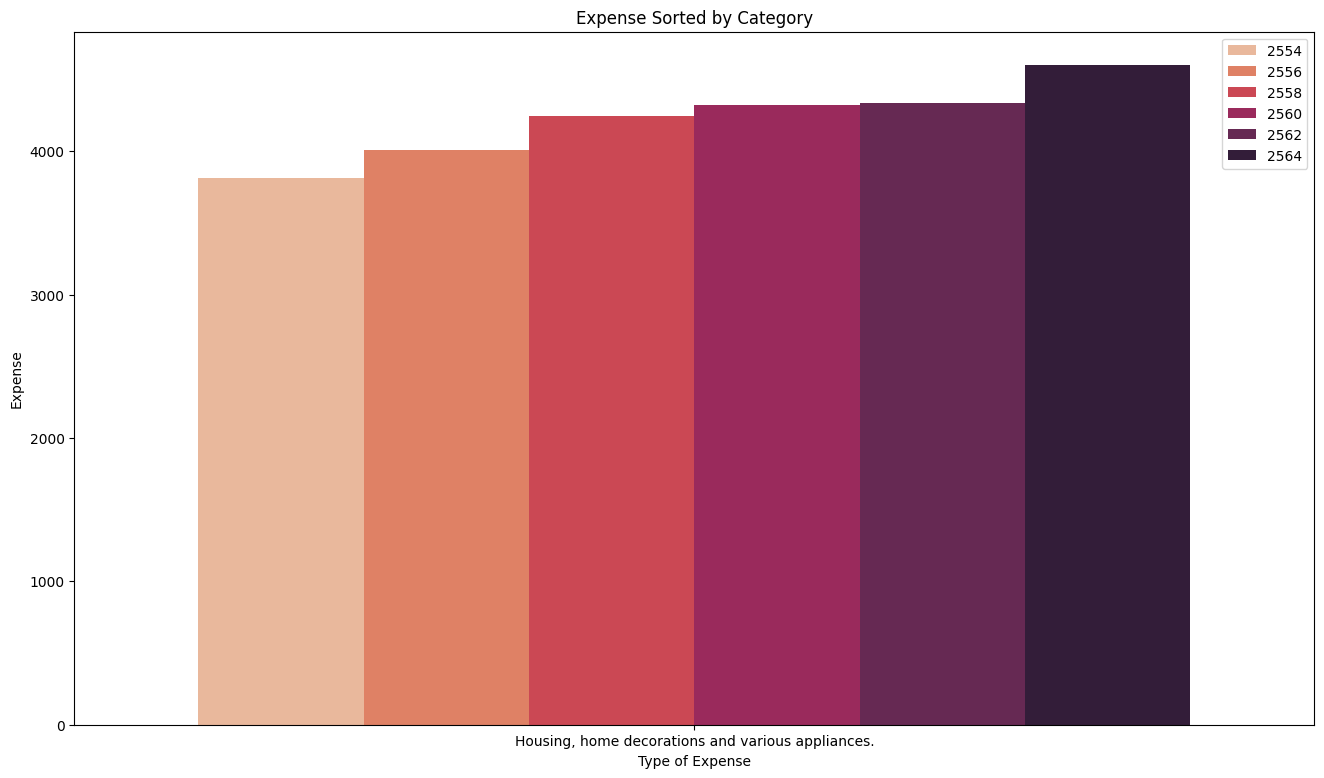

In [36]:
def update_plot(type_of_expense):

    df2_filtered = df2[df2['TYPE_EXPENSE'] == type_of_expense]
    
    plt.figure(figsize=(16, 9))
    sns.barplot(data = df2_filtered, x = "TYPE_EXPENSE", y="VALUE" ,hue="YEAR",errorbar=None, palette="rocket_r")
    plt.xlabel('Type of Expense')
    plt.ylabel('Expense')
    plt.title('Expense Sorted by Category')
    plt.legend()
    plt.show()

type_of_expense_values = df2['TYPE_EXPENSE'].unique().tolist()

dropdown_type_of_expense = widgets.Dropdown(options=type_of_expense_values, description='Type of Expense:')
display(dropdown_type_of_expense)

def on_dropdown_change(change):
    update_plot(dropdown_type_of_expense.value)

dropdown_type_of_expense.observe(on_dropdown_change, names='value')

update_plot(type_of_expense_values[0])